<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Постановка-задачи-" data-toc-modified-id="Постановка-задачи--1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Постановка задачи <a name="first" rel="nofollow"></a></a></span></li><li><span><a href="#Предобработка-данных-" data-toc-modified-id="Предобработка-данных--2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных <a name="second" rel="nofollow"></a></a></span></li><li><span><a href="#Проверка-данных-" data-toc-modified-id="Проверка-данных--3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Проверка данных <a name="third" rel="nofollow"></a></a></span></li><li><span><a href="#Воронка-событий-" data-toc-modified-id="Воронка-событий--4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Воронка событий <a name="fourth" rel="nofollow"></a></a></span></li><li><span><a href="#Проверка-гипотез-о-равенстве-долей-для-А/А-теста-и-А/В-теста-" data-toc-modified-id="Проверка-гипотез-о-равенстве-долей-для-А/А-теста-и-А/В-теста--5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Проверка гипотез о равенстве долей для А/А-теста и А/В-теста <a name="fifth" rel="nofollow"></a></a></span></li><li><span><a href="#Общие-выводы-" data-toc-modified-id="Общие-выводы--6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Общие выводы <a name="sixth" rel="nofollow"></a></a></span></li></ul></div>

# Проект по А/В тестированию

## Постановка задачи <a name="first"></a>

Стартап - мобильное приложение по продаже продуктов питания. Было внесено предложение об изменении шрифта в приложении, но прежде, чем внести изменения, необходимо определить повлияют ли эти изменения на поведение пользователей.  
Пользователи были разделены на 3 группы: 2-контрольные (со старым шрифтом) и 1-экспериментальная (с новым шрифтом в приложении) для проведения А/А/В тестирования.

**Задачи:**  
1. Определить: сколько пользователей доходит до покупки 
2. Провести тестирование, исследовать результаты эксперимента и определить: оказывает ли изменение шрифта значимое влияние на поведение пользователей.

## Предобработка данных <a name="second"></a>

In [39]:
import pandas as pd
from scipy import stats as st
import datetime as dt
import numpy as np
import math as mth
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px 
import plotly.graph_objs as go

In [40]:
#Прочитаем датасет:
try:
    logs = pd.read_csv('/datasets/logs_exp.csv', sep='\t')
except:
    logs = pd.read_csv('C:/Users/antig/Downloads/Яндекс Практикум/logs_exp.csv', sep='\t')
logs.head()

,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248


In [41]:
#Переименуем названия столбцов:
logs = logs.rename(columns={'EventName': 'event_name', 'DeviceIDHash': 'user_id',
                    'EventTimestamp': 'event_timestamp', 'ExpId': 'exp_id'})
logs.head()

,event_name,user_id,event_timestamp,exp_id
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248


In [42]:
#Общая информация о датасете:
logs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   event_name       244126 non-null  object
 1   user_id          244126 non-null  int64 
 2   event_timestamp  244126 non-null  int64 
 3   exp_id           244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB


In [43]:
#Извлечем дату и время:
logs['datetime'] = pd.to_datetime(logs['event_timestamp'], unit='s')
logs.head()

,event_name,user_id,event_timestamp,exp_id,datetime
0,MainScreenAppear,4575588528974610257,1564029816,246,2019-07-25 04:43:36
1,MainScreenAppear,7416695313311560658,1564053102,246,2019-07-25 11:11:42
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248,2019-07-25 11:28:47
3,CartScreenAppear,3518123091307005509,1564054127,248,2019-07-25 11:28:47
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248,2019-07-25 11:48:42


In [44]:
#Извлечем дату в отдельный столбец:
logs['date'] = logs['datetime'].dt.date
logs['date'] = pd.to_datetime(logs['date'])
logs.head()

,event_name,user_id,event_timestamp,exp_id,datetime,date
0,MainScreenAppear,4575588528974610257,1564029816,246,2019-07-25 04:43:36,2019-07-25
1,MainScreenAppear,7416695313311560658,1564053102,246,2019-07-25 11:11:42,2019-07-25
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25
3,CartScreenAppear,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248,2019-07-25 11:48:42,2019-07-25


In [45]:
#Проверим количество пропусков данных:
logs.isna().sum()

event_name         0
user_id            0
event_timestamp    0
exp_id             0
datetime           0
date               0
dtype: int64

In [46]:
#Определим количество явных дубликатов:
logs.duplicated().sum()

413

In [47]:
logs.drop_duplicates(inplace=True)
logs.reset_index(drop=True)

,event_name,user_id,event_timestamp,exp_id,datetime,date
0,MainScreenAppear,4575588528974610257,1564029816,246,2019-07-25 04:43:36,2019-07-25
1,MainScreenAppear,7416695313311560658,1564053102,246,2019-07-25 11:11:42,2019-07-25
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25
3,CartScreenAppear,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248,2019-07-25 11:48:42,2019-07-25
...,...,...,...,...,...,...
243708,MainScreenAppear,4599628364049201812,1565212345,247,2019-08-07 21:12:25,2019-08-07
243709,MainScreenAppear,5849806612437486590,1565212439,246,2019-08-07 21:13:59,2019-08-07
243710,MainScreenAppear,5746969938801999050,1565212483,246,2019-08-07 21:14:43,2019-08-07
243711,MainScreenAppear,5746969938801999050,1565212498,246,2019-08-07 21:14:58,2019-08-07


In [48]:
logs.shape

(243713, 6)

In [49]:
logs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243713 entries, 0 to 244125
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   event_name       243713 non-null  object        
 1   user_id          243713 non-null  int64         
 2   event_timestamp  243713 non-null  int64         
 3   exp_id           243713 non-null  int64         
 4   datetime         243713 non-null  datetime64[ns]
 5   date             243713 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(3), object(1)
memory usage: 13.0+ MB


**Вывод:**    
Датасет содержит 6 столбцов и 243 713 строк.
Данные очищены от дубликатов, не имеют пропусков, типы данных в каждом столбце правильные, названия столбцов приведены к нижнему регистру, с разделением слов в названии с помощью знака подчеркивания.
 В таком виде датасет готов к дальнейшей работе.

## Проверка данных <a name="third"></a>

In [50]:
#Определим количество событий в логе:
events_quantity = logs['event_name'].count()
print('Количество событий в логе:', events_quantity)

Количество событий в логе: 243713


In [51]:
#Определим количество пользователей в логе:
users = logs['user_id'].nunique()
print('Количество пользователей в логе:', users)

Количество пользователей в логе: 7551


In [52]:
#Определим сколько событий приходится на одного пользователя в среднем:
logs1 = logs.groupby('user_id')['exp_id'].count().reset_index()
logs1 =logs1.rename(columns={'exp_id':'exp_qty'})
exp_mean = logs1['exp_qty'].mean()
print('Среднее количество событий на пользователя:', exp_mean)

Среднее количество событий на пользователя: 32.27559263673685


In [53]:
#Определим максимальную дату проведения эксперимента:
logs['date'].max()

Timestamp('2019-08-07 00:00:00')

In [54]:
#Определим минимальную дату проведения эксперимента:
logs['date'].min()

Timestamp('2019-07-25 00:00:00')

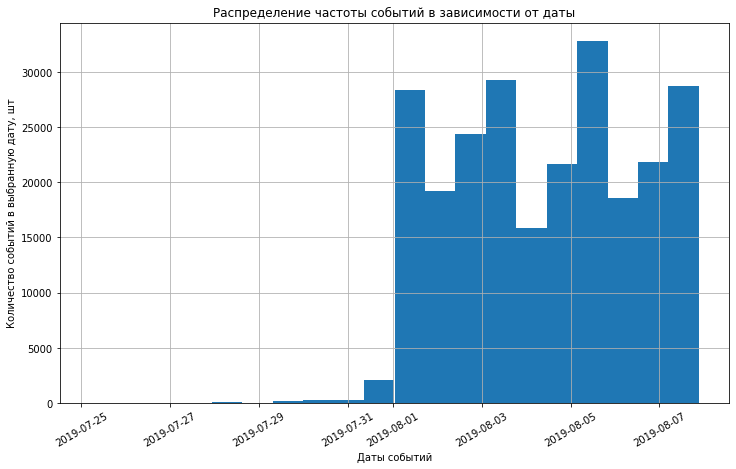

In [55]:
#Построим гистограмму частот распределения событий по датам:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
plt.figure(figsize=(12, 7))
logs['datetime'].hist(bins=20)
plt.xticks(rotation=30)
plt.xlabel('Даты событий')
plt.ylabel('Количество событий в выбранную дату, шт')
plt.title('Распределение частоты событий в зависимости от даты')
plt.show()

In [56]:
#Удалим неактуальный период времени:
logs_new = logs[(logs['date'] > '2019-07-31') & (logs['date'] <= '2019-08-07')]
logs_new.shape

(240887, 6)

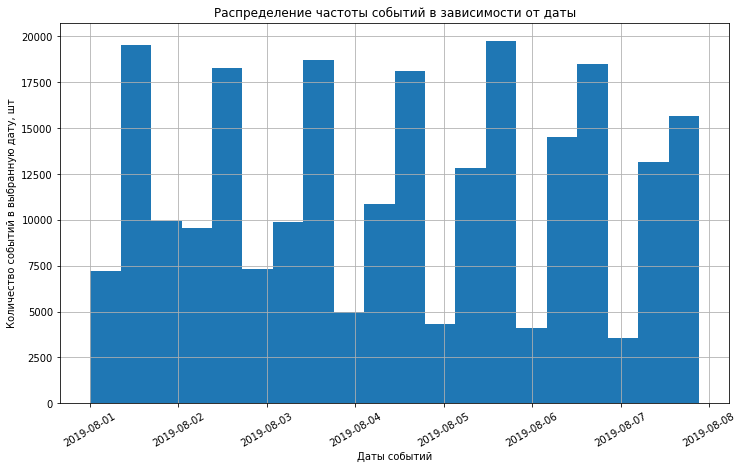

In [57]:
#Построим новую гистограмму после изменения периода:
plt.figure(figsize=(12, 7))
logs_new['datetime'].hist(bins=20)
plt.xticks(rotation=30)
plt.xlabel('Даты событий')
plt.ylabel('Количество событий в выбранную дату, шт')
plt.title('Распределение частоты событий в зависимости от даты')
plt.show()

In [58]:
#Определим количество пользователей в логе после удаления неактуального периода:
users_new = logs_new['user_id'].nunique()
print('Количество пользователей в логе:', users_new)

Количество пользователей в логе: 7534


После обработки мы "потеряли" 17 пользователей- это 0,22% от общего числа пользователей.

In [59]:
percent_after = (243713 - 240887)/243713 * 100
print('Количество удаленных событий после среза:', (243713 - 240887))
print('Процент удаленных неактуальных событий после обработки', '{0:.3f}'.format(percent_after))

Количество удаленных событий после среза: 2826
Процент удаленных неактуальных событий после обработки 1.160


In [60]:
#Проверим, во всех ли трех группах у нас присутствует равное или близкое к равному количество пользователей:
users_bygroup = logs_new.groupby('exp_id').agg(users_number=('user_id', 'nunique')).reset_index()
users_bygroup

,exp_id,users_number
0,246,2484
1,247,2513
2,248,2537


**Вывод:**  
1. В датасете содержатся события с 25.07.2019 по 08.08.2019  
2. Данные с 25.07.2019 по 31.07.2019 являются неактуальными, их количество является незначительным для эксперимента  
составляет 1.16%, поэтому их можно удалить.  
3. После удаления неактуального периода, события в датасете начинаются с 01.08.2019 и заканчиваются 08.08.2019.

## Воронка событий <a name="fourth"></a>

In [61]:
#Рассмотрим события в логе:
events = logs_new.groupby('event_name').agg(events_quantity=('event_name', 'count')
                                           ).sort_values(by='events_quantity', ascending=False)
events = events.reset_index()
events

,event_name,events_quantity
0,MainScreenAppear,117328
1,OffersScreenAppear,46333
2,CartScreenAppear,42303
3,PaymentScreenSuccessful,33918
4,Tutorial,1005


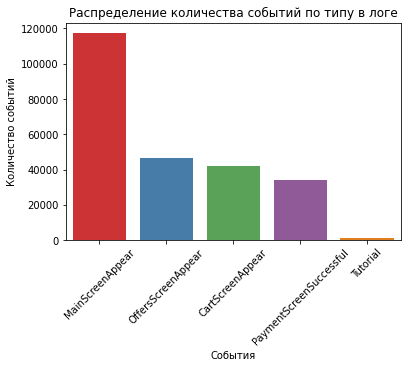

In [62]:
#Построим диаграмму распределения количества событий:
sns.barplot(x="event_name", y="events_quantity",
            palette=sns.color_palette('Set1', 10),
            data=events, ci=None)
plt.xticks(rotation=45)
plt.ylabel('Количество событий')
plt.xlabel('События')
plt.title('Распределение количества событий по типу в логе')
plt.show()

In [63]:
#Определим сколько пользователей совершали события:
users_events = logs_new.groupby('event_name').agg(users_quantity=('user_id', 'nunique')
                                                 ).sort_values(by='users_quantity',
                                                               ascending=False).reset_index()
users_events

,event_name,users_quantity
0,MainScreenAppear,7419
1,OffersScreenAppear,4593
2,CartScreenAppear,3734
3,PaymentScreenSuccessful,3539
4,Tutorial,840


In [64]:
#Определим долю пользователей, совершивших хотя бы одно событие:
users_events['percent'] = (users_events['users_quantity'] / users_new * 100)
users_events

,event_name,users_quantity,percent
0,MainScreenAppear,7419,98.473586
1,OffersScreenAppear,4593,60.963632
2,CartScreenAppear,3734,49.561986
3,PaymentScreenSuccessful,3539,46.973719
4,Tutorial,840,11.149456


In [65]:
users_events = users_events.query('event_name != "Tutorial"')

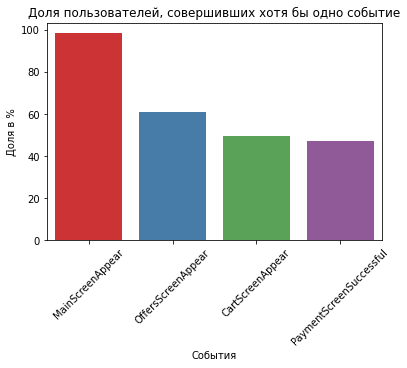

In [66]:
#Построим диаграмму распределения количества событий:
sns.barplot(x="event_name", y="percent",
            palette=sns.color_palette('Set1', 10),
            data=users_events, ci=None)
plt.xticks(rotation=45)
plt.ylabel('Доля в %')
plt.xlabel('События')
plt.title('Доля пользователей, совершивших хотя бы одно событие')
plt.show()

Проанализировав данные, можно сделать вывод о том, что событий в логе всего 5:  
-"MainScreenAppear"- просмотр главного экрана,  
-"OffersScreenAppear"- экран с предложением,  
-"CartScreenAppear" - экран "Корзина",  
-"PaymentScreenAppear"- экран с платежным поручением об оплате,  

Предположим, что последовательность событий следующая:    
1. MainScreenAppear  
2. OffersScreenAppear  
3. CartScreenAppear  
4.PaymentScreenAppear

Из 7534 пользователей только 7419 открывали главный экран приложения, что говорит о том, что эти пользователи попали на другие этапы по прямым ссылкам. Получается что события не всегда выстраиваются в последовательную цепочку.

In [67]:
#Построим воронку событий для пользователей:
fig = go.Figure(
    go.Funnel(
        y=users_events['event_name'],
        x=users_events['users_quantity'],
      textinfo = "value+percent initial+percent previous",
    hoverinfo="text")
)
fig.show() 

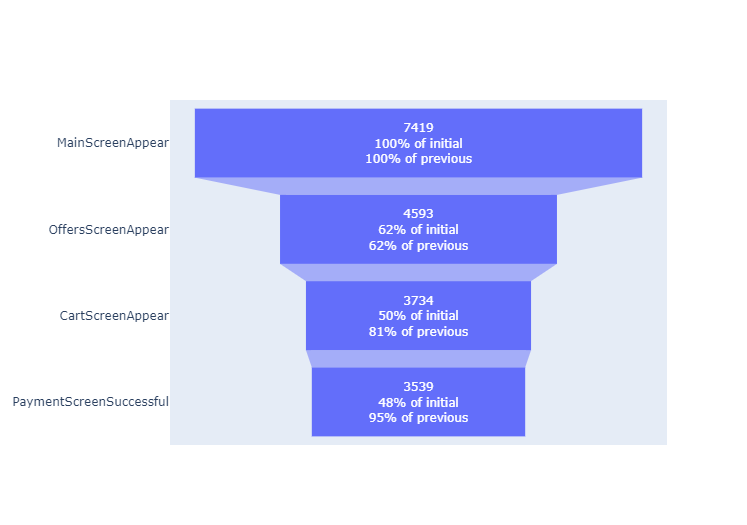

**Вывод:**  
Судя по воронке, больше всего пользователей теряется при переходе к шагу OffersScreenAppear (62% пользователей совершают этот шаг из всех пользователей), то есть при переходе с основного экрана к экрану с предложениями. Это может быть связано с тем, что пользователь может сразу с основной страницы попадать в корзину, выбирая товары на главной странице.
При этом до получения платежного поручения, то есть до совершения оплаты или PaymentScreenSuccsseful, доходит 48% всех пользователей, посетивших приложение.

## Проверка гипотез о равенстве долей для А/А-теста и А/В-теста <a name="fifth"></a>

In [30]:
#Количество пользователей в группах:
users_bygroup = users_bygroup.rename(columns={'exp_id': 'group'})
users_bygroup

,group,users_number
0,246,2484
1,247,2513
2,248,2537


In [31]:
#Разделим всех пользователей по группам:
group_a1 = logs_new.query('exp_id == 246')
#group_a1
group_a2 = logs_new.query('exp_id == 247')
group_b = logs_new.query('exp_id == 248')

In [32]:
#Определим самое популярное событие:
print(group_a1['event_name'].value_counts())
print()
print(group_a2['event_name'].value_counts())
print()
print(group_b['event_name'].value_counts())

MainScreenAppear           37676
OffersScreenAppear         14767
CartScreenAppear           14690
PaymentScreenSuccessful    11852
Tutorial                     317
Name: event_name, dtype: int64

MainScreenAppear           39090
OffersScreenAppear         15179
CartScreenAppear           12434
PaymentScreenSuccessful     9981
Tutorial                     338
Name: event_name, dtype: int64

MainScreenAppear           40562
OffersScreenAppear         16387
CartScreenAppear           15179
PaymentScreenSuccessful    12085
Tutorial                     350
Name: event_name, dtype: int64


Очевидно, что самым популярным событием является "MainScreenAppear" для всех трех групп.

In [33]:
#Определим число и долю пользователей в каждой из групп, совершивших это событие:
logs_grouped = logs_new.query('event_name == "MainScreenAppear"').groupby('exp_id').agg(
    count_of_users=('user_id', 'nunique')).reset_index()
logs_grouped['percent_of_users'] = (logs_grouped['count_of_users'] / users_new * 100).round(2).astype(str) + '%'
logs_grouped

,exp_id,count_of_users,percent_of_users
0,246,2450,32.52%
1,247,2476,32.86%
2,248,2493,33.09%


Сформулируем гипотезы для дальнейшей их проверки:  
**Нулевая гипотеза Н0:** Изменение шрифта в приложении для каждого шага не имеет статистически значимого влияния среди пользователей; доли пользователей, использующих приложении до и после внедрения изменений, равны.  
**Альтернативная гипотеза Н1:** Изменение шрифта в приложении имеет статистически значимое влияние среди пользователей; доли пользователей до и после внедрения изменений, не равны.

In [34]:
#Создадим функцию для проверки разницы между долями в группах 246 и 247(AA тест):
 # критический уровень статистической значимости

def stat_test(data_1, data_2, event, alpha):
    leads_0 = data_1['user_id'].nunique()
    leads_1 = data_2['user_id'].nunique()
    event == event
    #считаем число уникальных пользователей для каждого события и долю пользователей,
    #совершивших это событие
    actions_0 = data_1.query('event_name in @event')['user_id'].nunique()
    actions_1 = data_2.query('event_name in @event')['user_id'].nunique()
    p1 = actions_0 / leads_0
    p2 = actions_1 / leads_1

    p_combined = (actions_0 + actions_1) / (leads_0 + leads_1)

    difference = p1 - p2 
    z_value = difference / mth.sqrt(
    p_combined * (1 - p_combined) * (1 / leads_0 + 1 / leads_1))

    distr = st.norm(0, 1) 

    p_value = (1 - distr.cdf(abs(z_value))) * 2

    print('p-значение: ', '{0:.3f}'.format(p_value))

    if p_value < alpha:
        print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
    else:
        print(
        'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными'
    )
alpha = 0.01
print(stat_test(group_a1, group_a2, "MainScreenAppear", alpha))
print(stat_test(group_a1, group_a2, "OffersScreenAppear", alpha))
print(stat_test(group_a1, group_a2, "CartScreenAppear", alpha))
print(stat_test(group_a1, group_a2, "PaymentScreenSuccessful", alpha))

p-значение:  0.757
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
None
p-значение:  0.248
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
None
p-значение:  0.229
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
None
p-значение:  0.115
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
None


Из результатов тестирования следует, что:  
-различие ключевых метрик по группам 246 и 247 не превышает 1% и не имеет статистической значимости;  
-количество пользователей в различных группах различается не более, чем на 1%;
Тест можно считать успешным


In [35]:
#Проверим разницу между долями в контрольной группе 246 и экспериментальной группе 248:
alpha = 0.05 # критический уровень статистической значимости
print(stat_test(group_a1, group_b, "MainScreenAppear", alpha))
print()
print(stat_test(group_a1, group_b, "OffersScreenAppear",alpha))
print()
print(stat_test(group_a1, group_b, "CartScreenAppear", alpha))
print()
print(stat_test(group_a1, group_b, "PaymentScreenSuccessful", alpha))

p-значение:  0.295
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
None

p-значение:  0.208
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
None

p-значение:  0.078
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
None

p-значение:  0.212
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
None


In [36]:
#Проверим разницу между долями в контрольной группе 246 и экспериментальной группе 248:
alpha = 0.05 # критический уровень статистической значимости
print(stat_test(group_a2, group_b, "MainScreenAppear", alpha))
print()
print(stat_test(group_a2, group_b, "OffersScreenAppear", alpha))
print()
print(stat_test(group_a2, group_b, "CartScreenAppear", alpha))
print()
print(stat_test(group_a2, group_b, "PaymentScreenSuccessful", alpha))

p-значение:  0.459
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
None

p-значение:  0.920
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
None

p-значение:  0.579
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
None

p-значение:  0.737
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
None


**Вывод:** При уровне значимости alpha=0.05 мы не можем отвергнуть гипотезу о том, что наши доли равны.  
То есть, при замене шрифтов для каждого шага в приложении не появляется существенных изменений.

**Поправка Бонферрони**

Так как в рамках нашего эксперимента мы проводим множественные сравнения между группами на одних и тех же данных, то возрастает вероятность совершения ошибки первого рода- отвергнуть верную нулевую гипотезу.  
Скорректируем наш уровень значимости с помощью поправки Бонферрони:

In [37]:
alpha = 0.0125 # (0.05/4) # критический уровень статистической значимости

print(stat_test(group_a1, group_b, "MainScreenAppear", alpha))
print()
print(stat_test(group_a1, group_b, "OffersScreenAppear", alpha))
print()
print(stat_test(group_a1, group_b, "CartScreenAppear", alpha))
print()
print(stat_test(group_a1, group_b, "PaymentScreenSuccessful", alpha))

p-значение:  0.295
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
None

p-значение:  0.208
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
None

p-значение:  0.078
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
None

p-значение:  0.212
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
None


In [38]:
alpha = 0.0125 # (0.05/4) # критический уровень статистической значимости

print(stat_test(group_a2, group_b, "MainScreenAppear", alpha))
print()
print(stat_test(group_a2, group_b, "OffersScreenAppear", alpha))
print()
print(stat_test(group_a2, group_b, "CartScreenAppear", alpha))
print()
print(stat_test(group_a2, group_b, "PaymentScreenSuccessful", alpha))

p-значение:  0.459
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
None

p-значение:  0.920
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
None

p-значение:  0.579
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
None

p-значение:  0.737
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
None


## Общие выводы <a name="sixth"></a>

1. В представленном логе событий рассматривается период с 25.07.2019 по 08.08.2019, при этом данные с 25.07 по 31.07.2019 составляют 1.16% от всего объема данных, поэтому не являются значимыми для эксперимента. Соответственно, после исключения этих данных рассматриваемый период в исследовании- с 01.08.2019 по 08.08.2019. 
2. Воронка событий показывает, что самым распространенным событием является "MainScreenAppear"- просмотр главного экрана, и больше всего пользователей теряется при переходе с основного экрана к следующему шагу "OffersScreenAppear"- просмотр предложений интернет-магазина(38% пользователей теряется на этом шаге). Возможно, они сразу переходят в корзину с главного экрана и совершают заказ там, либо экран с предложениями недостаточно привлекателен для них- в этом случае можно было бы провести отдельное исследование с целью выяснения причины и узнать,как не терять такое количество пользователей и насколько изменится число заказов, если хотя бы часть потерянных пользователей на этом шаге, удастся привлечь.
3. В ходе исследования было проведено 3 проверки статистических гипотез: между двумя контрольными группами 246 и 247 (А/А тест), между контрольной группой 246 и экспериментальной группой 248 и между контрольной группой 247 и экспериментальной группой 248.  
4. Результат А/А тестирования показал, что между контрольными группами нет статистически значимых различий.  
5. Результат А/В тестирования показал, что между контрольной и экспериментальной группами также нет статистически значимых различий, то есть: изменение шрифта в приложении не окажет статистически значимого влияния на количество пользователей.
6. После корректировки уровня значимости на поправку Бонферрони, также видим, что статистически значимых различий в группах нет.